# Problem Set 4 CS129.18

## Requirements


>Geospatial Analytics is a domain heavily used in corporate and business data science. It's used for demand-forecasting, real-estate prediction, population estimation, and optimal route planning..

Using the lessons on DBSCAN, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What are the top 3 most common coffee places? ( 1pt )

2. What is the latitude variance and longitude variance, and explain why these variances are different. ( 3pts )

3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon. ( 4pts )

4. Cluster the locations data with DBSCAN. ( 5pts )

5. Present an analysis of the data following the DBSCAN results. ( 7pts )
 - explain what the clusters mean
 - what does the # of clusters tell us
 - what is this information useful for





-----


Bonus 1 : What is your favorite coffee shop? (1pt)


Bonus 2 : Run everything on your own geospatial dataset, and answer the same questions listed above. (5pts)
Use this: https://developer.foursquare.com/docs/resources/categories
 
----

**Submit this file on Moodle on the submission link I will provide. This is due October 25 12mn.**

# Libraries


In [1]:
# conda install -c conda-forge folium 
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import foursquare

plt.style.use('ggplot')

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df = pd.read_csv("data/coffeeshops.csv")
df = df.drop_duplicates()

In [3]:
df.head()

id                        name        lat         lng  checkins                                 address
0  4b78d398f964a520cee32ee3            Starbucks Coffee  14.734710  121.057599     10428  Ground Flr, SM City Fairview (Annex 1)
1  53055beb498e87041e7204f9            Starbucks Coffee  14.735735  121.060213      3793          Fairview Terraces, Quirino Hwy
2  4bc1f1a6f8219c74a0f7b310  The Coffee Bean & Tea Leaf  14.736308  121.058135     17441         G/F Gateway Mall, Gen Roxas Ave
3  4e5b077352b1b78b81b213b9            Starbucks Coffee  14.734639  121.059474      4116   2nd Flr, SM City Fairview (Main Bldg)
4  4ceb3522e888f04d2161516b            Starbucks Coffee  14.553593  121.050662     40149       Crossroads, Bonifacio Global City

In [4]:
len(df)

313

In [5]:
df.describe()

lat         lng      checkins
count  313.000000  313.000000    313.000000
mean    14.576405  121.036301   6261.146965
std      0.084305    0.039372   6268.944422
min     14.102268  120.860697      1.000000
25%     14.551362  121.019758   1159.000000
50%     14.575758  121.034795   4823.000000
75%     14.617451  121.056043   9390.000000
max     14.869520  121.251941  40149.000000

# 1. What are the top 3 most common coffee places?

In [6]:
df['name'].value_counts().head(3)

Starbucks Coffee              151
The Coffee Bean & Tea Leaf     31
Seattle's Best Coffee          15
Name: name, dtype: int64

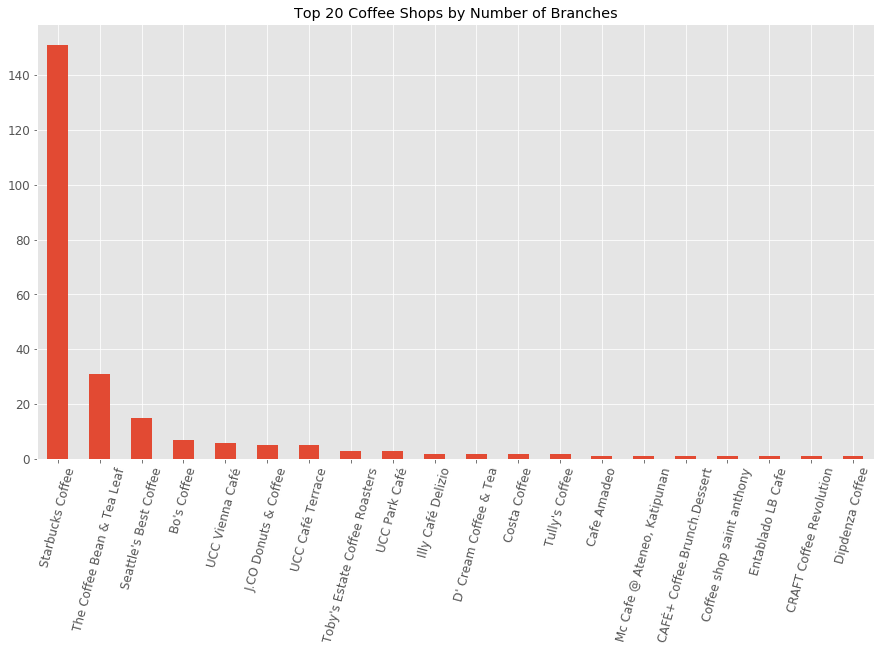

In [7]:
fig, ax = plt.subplots()
df['name'].value_counts().head(20).plot(ax=ax, kind='bar', \
                                        title ="Top 20 Coffee Shops by Number of Branches",figsize=(15,8), fontsize=12, rot=75)

# 2. What is the latitude variance and longitude variance, and explain why these variances are different. 

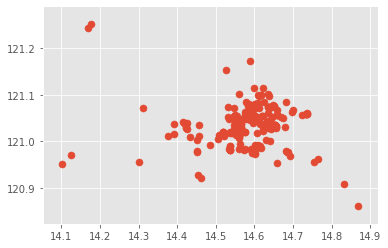

In [8]:
X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [9]:
lat = np.var(df["lat"]) 
long = np.var(df["lng"]) 
print(f"Latitude variance: {lat}")
print(f"Longitude variance: {long}")

Latitude variance: 0.007084704849792397
Longitude variance: 0.0015451639830389963



The two variances are completely different because latitude and longitude are different measurements of location; Latitude is a measure from north to south; Longitude from east to west

# 3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon.

#### Kmeans inertia 
>is a criterion in the Kmeans algorithm that is recognized as the measure of how internally coherent clusters are. Clusters are said to be inherently coherent once it has reached the minimum of the squares of the differences between the samples and the mean of the cluster and the mean of a particular cluster. <br><br> KMeans is distance-based

#### DBSCAN epsilon
>is a parameter in the DBSCAN algorithm that defines the density of points. <br><br>DBScan is density-based


# 4. Cluster the locations data with DBSCAN.

In [10]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True, popup = folium.Popup(row["name"], parse_html=True)).add_to(basemap)
    
basemap.save('coffeeshops.html')

basemap

In [11]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

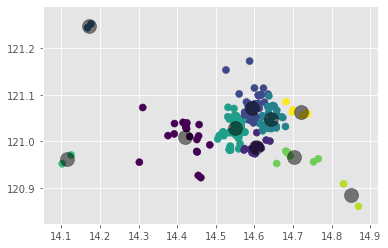

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [13]:
df["cluster"] = y_kmeans

In [14]:
df.head()

id                        name        lat         lng  checkins                                 address  cluster
0  4b78d398f964a520cee32ee3            Starbucks Coffee  14.734710  121.057599     10428  Ground Flr, SM City Fairview (Annex 1)        9
1  53055beb498e87041e7204f9            Starbucks Coffee  14.735735  121.060213      3793          Fairview Terraces, Quirino Hwy        9
2  4bc1f1a6f8219c74a0f7b310  The Coffee Bean & Tea Leaf  14.736308  121.058135     17441         G/F Gateway Mall, Gen Roxas Ave        9
3  4e5b077352b1b78b81b213b9            Starbucks Coffee  14.734639  121.059474      4116   2nd Flr, SM City Fairview (Main Bldg)        9
4  4ceb3522e888f04d2161516b            Starbucks Coffee  14.553593  121.050662     40149       Crossroads, Bonifacio Global City        5

In [15]:
palette = sns.color_palette("pastel", 10).as_hex()
palette

['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#fab0e4',
 '#cfcfcf',
 '#fffea3',
 '#b9f2f0']

In [16]:
color_getter = lambda x: palette[int(x)]
df["color"] = df["cluster"].map(color_getter)
df.head()

id                        name        lat         lng  checkins                                 address  cluster    color
0  4b78d398f964a520cee32ee3            Starbucks Coffee  14.734710  121.057599     10428  Ground Flr, SM City Fairview (Annex 1)        9  #b9f2f0
1  53055beb498e87041e7204f9            Starbucks Coffee  14.735735  121.060213      3793          Fairview Terraces, Quirino Hwy        9  #b9f2f0
2  4bc1f1a6f8219c74a0f7b310  The Coffee Bean & Tea Leaf  14.736308  121.058135     17441         G/F Gateway Mall, Gen Roxas Ave        9  #b9f2f0
3  4e5b077352b1b78b81b213b9            Starbucks Coffee  14.734639  121.059474      4116   2nd Flr, SM City Fairview (Main Bldg)        9  #b9f2f0
4  4ceb3522e888f04d2161516b            Starbucks Coffee  14.553593  121.050662     40149       Crossroads, Bonifacio Global City        5  #debb9b

In [17]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        fill=True,
        color =row["color"],
        popup = folium.Popup(row["name"], parse_html=True),
        fill_color=row["color"]).add_to(basemap)
    
basemap.save('coffeeshops.html')

basemap

In [18]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

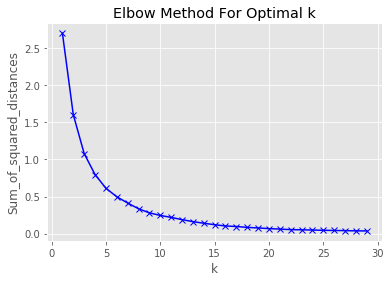

In [19]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
xp=df.groupby('name').count().sort_values(by ='id', ascending=False).head(3)
xp

id  lat  lng  checkins  address  cluster  color  dbscan_cluster  db_color
name                                                                                                 
Starbucks Coffee            81   81   81        81       81       81     81              81        81
The Coffee Bean & Tea Leaf  24   24   24        24       24       24     24              24        24
Seattle's Best Coffee       11   11   11        11       11       11     11              11        11

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.005, min_samples=5).fit(X)
y_dbscan = dbscan.labels_

In [22]:
y_dbscan

array([ 0,  0,  0,  0,  1,  0,  2, -1,  3, -1, -1, -1,  2,  1, -1, -1, -1,
        1,  4, -1,  2, -1, -1,  4,  2,  2, -1, -1, -1,  2,  2, -1, -1,  5,
        6, -1, -1, -1, -1, -1, -1,  6, -1, -1, -1, -1, -1,  1, -1, -1,  0,
        7, -1,  8, -1,  1, -1,  9, -1, -1, -1,  8,  1, -1, -1,  1, -1,  2,
       -1,  3, -1, -1,  4,  2, 10,  6,  2, -1, -1,  2, 10, -1, -1,  5, -1,
        2,  5, -1, -1, -1, -1,  8, -1, -1,  5,  5,  5,  5, -1, -1, -1, -1,
       -1,  5,  5, -1, -1, -1,  3,  3,  3,  9, -1, -1,  5,  9, -1,  7,  5,
       -1, -1, -1, -1,  9,  9, -1,  9,  9,  4,  4, -1,  4,  4, -1,  9,  9,
       -1,  9,  6,  6, -1, -1, -1,  3, -1, -1,  7,  3, -1, -1,  8,  8,  8,
        8,  8, -1,  8, -1, -1,  8,  8, -1,  8, -1,  6,  6, -1, -1, -1,  7,
        7,  6, -1,  6,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
       -1, -1, -1,  1,  1,  6,  6,  6,  6,  6, -1,  6, -1,  2,  2, -1,  2,
        2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,
       -1,  2,  2,  2,  2

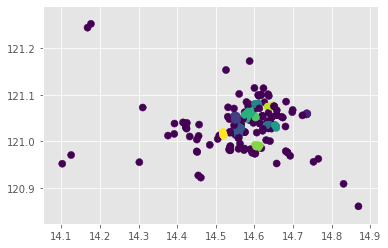

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

In [24]:
df["dbscan_cluster"] = y_dbscan
palette = sns.color_palette("pastel", len(y_dbscan)).as_hex()
color_getter = lambda x: palette[int(x)]
df["db_color"] = df["dbscan_cluster"].map(color_getter)
df

id                             name        lat         lng  checkins                                 address  cluster    color  dbscan_cluster db_color
0     4b78d398f964a520cee32ee3                 Starbucks Coffee  14.734710  121.057599     10428  Ground Flr, SM City Fairview (Annex 1)        9  #b9f2f0               0  #a1c9f4
1     53055beb498e87041e7204f9                 Starbucks Coffee  14.735735  121.060213      3793          Fairview Terraces, Quirino Hwy        9  #b9f2f0               0  #a1c9f4
2     4bc1f1a6f8219c74a0f7b310       The Coffee Bean & Tea Leaf  14.736308  121.058135     17441         G/F Gateway Mall, Gen Roxas Ave        9  #b9f2f0               0  #a1c9f4
3     4e5b077352b1b78b81b213b9                 Starbucks Coffee  14.734639  121.059474      4116   2nd Flr, SM City Fairview (Main Bldg)        9  #b9f2f0               0  #a1c9f4
4     4ceb3522e888f04d2161516b                 Starbucks Coffee  14.553593  121.050662     40149       Crossroads, Bonifacio Global City        5  #debb9b               1  #ffb482
...                        ...                              ...        ...         ...       ...                                     ...      ...      ...             ...      ...
4549  4ba4e69ef964a520dac038e3                 Starbucks Coffee  14.610225  121.079915      6875                  4th Flr, Eastwood Mall        2  #8de5a1               4  #d0bbff
4557  4cc412bd3d7fa1cdb2a9a95f             Ghenne's Coffee Shop  14.603783  121.079698       208                                Shopwise        2  #8de5a1               4  #d0bbff
4558  4e3758efd164374eb6867059  Dexter's Bakeshop & Coffee Shop  14.612650  121.070580       233                            White Plains        2  #8de5a1              -1  #8de5a1
4623  573d3faf498e71521269de67                 Starbucks Coffee  14.650662  121.075041       698                      U.P. Town Center 2        4  #d0bbff              -1  #8de5a1
4627  576a0ebecd10cea1698ddc36       The Coffee Bean & Tea Leaf  14.651505  121.075271       510                        U.P. Town Center        4  #d0bbff              -1  #8de5a1

[313 rows x 10 columns]

In [25]:
df = df[df["dbscan_cluster"] > -1]

In [26]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=12)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True,
    color =row["db_color"],
                        popup = folium.Popup(row["name"], parse_html=True),
    fill_color=row["db_color"]).add_to(basemap)
    
basemap.save('coffeeshops.html')

basemap

# 5. Present an analysis of the data following the DBSCAN results. 
- explain what the clusters mean
- what does the # of clusters tell us
- what is this information useful for

### Analysis
> - The clusters show the areas that are populated with a high density of coffeeshops.
- The number of clusters (10) show us that not only are the coffeeshops highly dense in each area, but they are fairly spread out throughout Metro Manila. 
- Data visualized like this allow us to easily pinpoint areas that coffee shops thrive in. This information could prove useful for someone trying to franchise or start their own cofee shop. 

# Bonus 1
My personal favorite is CBTL, I love their drinks. Sadly I barely go to CBTL in Katipunan because the one in Regis is small and the wifi there is kinda weak

# Bonus 2

In [27]:
places = ["14.73371, 121.06813", "14.73554, 121.01268", "14.72026, 120.96342", \
          "14.6922, 121.06212", "14.69037, 121.01732", "14.68954, 120.97063", \
          "14.65517, 121.05182", "14.65866, 121.01028", "14.64703, 120.9708", \
          "14.6364, 121.07414", "14.64819, 121.1174", "14.62361, 121.03998", \
          "14.61049, 120.9914", "14.60949, 121.10658", "14.60152, 121.05165", \
          "14.56946, 121.09491", "14.5776, 121.05972", "14.5771, 121.02865", \
          "14.5565, 121.02092", "14.55583, 121.02607", "14.55583, 121.02607", \
          "14.55002, 121.06126", "14.55002, 121.04581", "14.5241, 121.02127", \
          "14.47723, 121.02521", "14.44631, 121.00221", "14.40209, 121.02779",
          "14.40209, 121.02779", "14.60974, 121.08002", "14.64969, 121.0747", "14.6091, 121.0223"]
topics = ["taco", "mexican", "nacho", "quesadilla", "burrito", "store", "food"]

In [41]:
# Construct the client object
client = foursquare.Foursquare(client_id='LK0U2PMB3ZFV3DH03TKBF2H04KUBRHFOZOZNHP5NWOESAALM', 
                               client_secret='PKNTSEUE5L4T533TSRI4JTNND3KQTOLGJAZVTTFT5EU3HCU4', 
                               redirect_uri='http://fondu.com/oauth/authorize')

# Build the authorization url for your app
auth_uri = client.oauth.auth_url()

In [51]:
response = [client.venues.search(params={'query': topic, 
                                         'll': place,
                                        'radius': 2000,
                                        'limit': 30, 
                                        'intent': "browse", 
                                        'categoryId': '4bf58dd8d48988d1c1941735'})
           for place in places for topic in topics]

In [52]:
data_list = []
for x in range(len(response)):
    try:
        for i in range(len(response[x]["venues"])):
            poi_id =  response[x]["venues"][i]["id"]
            poi_name =  response[x]["venues"][i]["name"]
            poi_lat =  response[x]["venues"][i]["location"]["lat"]
            poi_lng =  response[x]["venues"][i]["location"]["lng"]
            data_list.append([poi_id, poi_name, poi_lat, poi_lng])
    except KeyError:
        pass

df2 = pd.DataFrame(data_list, columns=["id", "name", "lat", "lng"])
df2.to_csv("mex.csv")

In [53]:
df2 = pd.read_csv("mex.csv")
df2 = df2.drop_duplicates()
df2.head()

Unnamed: 0                        id                              name        lat         lng
0           0  4c8ccfebcf3ea1436c5cf851     Original Jamaican Pattie Shop  14.653031  121.033826
1           1  540618c8498ede8bd3b8d858              Jamaican Pattie Shop  14.658800  121.057397
2           2  4fa8e772e4b04e4b0698b89d              Jamaican pattie shop  14.656747  121.041049
3           3  55c9b399498ec27968bccbae  de Original Jamaican Pattie Shop  14.641873  121.040568
4           4  58561e4f735a4d5c6468d7f7                Hermanos Taco Shop  14.629608  121.034298

In [54]:
lat = np.var(df2["lat"])
lng = np.var(df2["lng"])
print(f"Latitude variance: {lat}")
print(f"Longitude variance: {lng}")

Latitude variance: 0.0032296866876063675
Longitude variance: 0.00041036066619749547


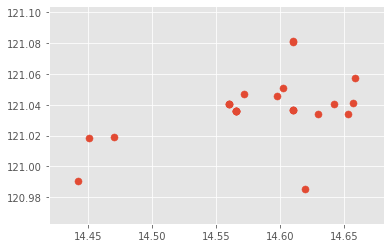

In [55]:
X = np.array(df2[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [56]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

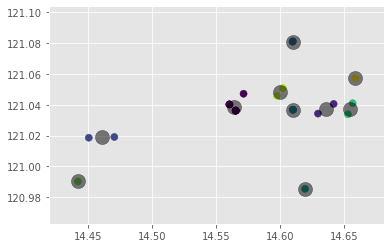

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [61]:
df2["cluster"] = y_kmeans

palette = sns.color_palette("pastel", 10).as_hex()

color_getter = lambda x: palette[int(x)]
df2["color"] = df2["cluster"].map(color_getter)
df2.head()

Unnamed: 0                        id                              name        lat         lng  cluster    color
0           0  4c8ccfebcf3ea1436c5cf851     Original Jamaican Pattie Shop  14.653031  121.033826        6  #fab0e4
1           1  540618c8498ede8bd3b8d858              Jamaican Pattie Shop  14.658800  121.057397        9  #b9f2f0
2           2  4fa8e772e4b04e4b0698b89d              Jamaican pattie shop  14.656747  121.041049        6  #fab0e4
3           3  55c9b399498ec27968bccbae  de Original Jamaican Pattie Shop  14.641873  121.040568        1  #ffb482
4           4  58561e4f735a4d5c6468d7f7                Hermanos Taco Shop  14.629608  121.034298        1  #ffb482

In [62]:
df2 = df2[df2["cluster"] > -1]

In [63]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df2.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        fill=True,
        color =row["color"],
        popup = folium.Popup(row["name"], parse_html=True),
        fill_color=row["color"]).add_to(basemap)
    
basemap.save('mex.html')

basemap